In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week3/Analysis/')

### Energy minimization process

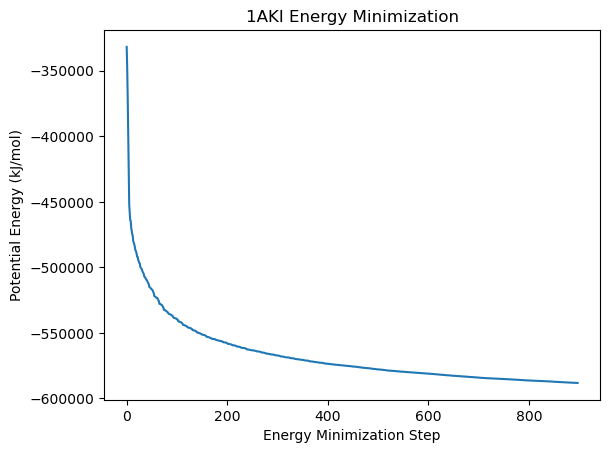

In [6]:
# read in the xvg file
e_minim_data = np.loadtxt("../Setup/energy_minimization/energy_minim_potential.xvg", skiprows=24)
# plot potential energy vs. time
plt.plot(e_minim_data[:,0], e_minim_data[:,1])
plt.xlabel("Energy Minimization Step")
plt.ylabel("Potential Energy (kJ/mol)")
plt.savefig("../Figures/energy_minimization.pdf")
plt.title("1AKI Energy Minimization")
plt.show()

### NVT Equilibration: Temperature vs. Time

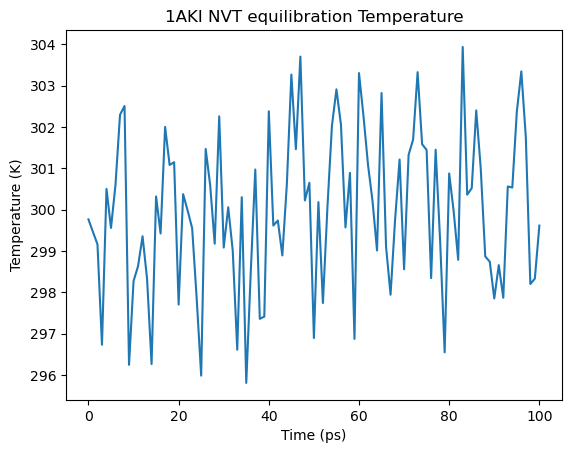

In [5]:
# read in the xvg file
nvt_temperature_data = np.loadtxt("../Setup/nvt_equilibration/nvt_temperature.xvg", skiprows=24)
# plot temperature vs. time
plt.plot(nvt_temperature_data[:,0], nvt_temperature_data[:,1])
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.savefig("../Figures/nvt_temperature.pdf")
plt.title("1AKI NVT equilibration Temperature")
plt.show()

### NPT Equilibration: Pressure vs. Time

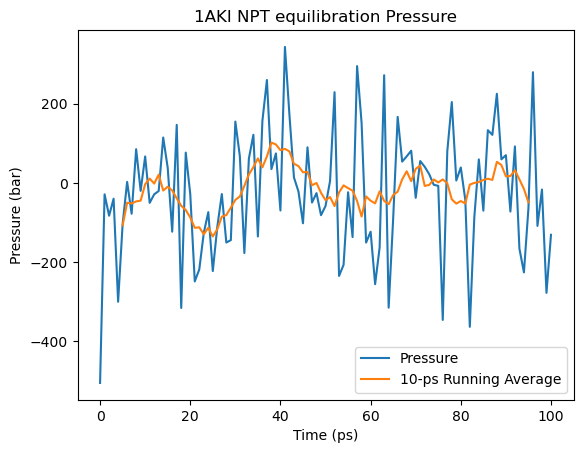

In [20]:
# read in the xvg file
npt_pressure_data = np.loadtxt("../Setup/npt_equilibration/npt_pressure.xvg", skiprows=24)
# calculate 10-ps running average of pressure
npt_pressure_avg = np.zeros(len(npt_pressure_data[:,1]))
total_time = len(npt_pressure_data[:,1])
for i in range(0, total_time):
    if 5 <= i <= total_time - 5:
        npt_pressure_avg[i] = np.mean(npt_pressure_data[i-5:i+5, 1])
# plot 10-ps running average of pressure and every-step pressure together
plt.plot(npt_pressure_data[:,0], npt_pressure_data[:,1], label="Pressure")
plt.plot(npt_pressure_data[5:total_time-5,0], npt_pressure_avg[5:total_time-5], label="10-ps Running Average")
plt.xlabel("Time (ps)")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.title("1AKI NPT equilibration Pressure")
plt.savefig("../Figures/npt_pressure.pdf")
plt.show()

### NPT Equilibration: Density vs. Time

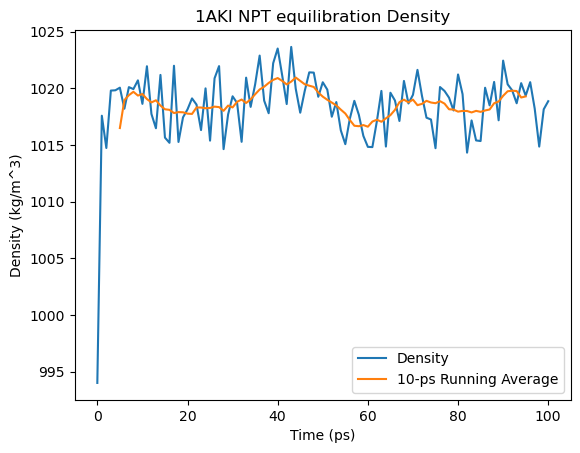

In [22]:
# read in the xvg file
npt_density_data = np.loadtxt("../Setup/npt_equilibration/npt_density.xvg", skiprows=24)
# calculate 10-ps running average of density
npt_density_avg = np.zeros(len(npt_density_data[:,1]))
total_time = len(npt_density_data[:,1])
for i in range(0, total_time):
    if 5 <= i <= total_time - 5:
        npt_density_avg[i] = np.mean(npt_density_data[i-5:i+5, 1])
# plot 10-ps running average of density and every-step density together
plt.plot(npt_density_data[:,0], npt_density_data[:,1], label="Density")
plt.plot(npt_density_data[5:total_time-5,0], npt_density_avg[5:total_time-5], label="10-ps Running Average")
plt.xlabel("Time (ps)")
plt.ylabel("Density (kg/m^3)")
plt.legend()
plt.title("1AKI NPT equilibration Density")
plt.savefig("../Figures/npt_density.pdf")
plt.show()

### RMSD analysis for 1ns MD simulation result

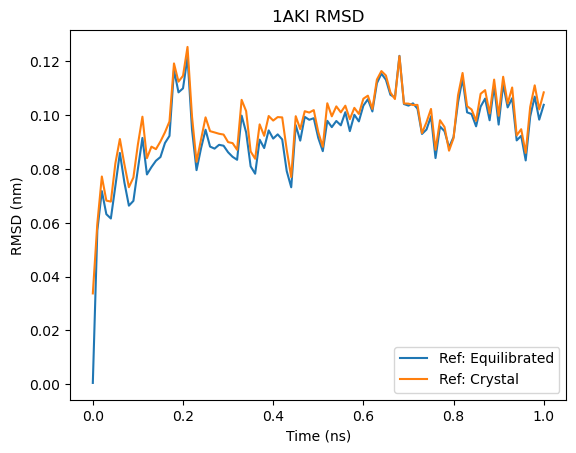

In [4]:
# read in the xvg file
rmsd_md_data = np.loadtxt("../Data/md_1ns/rmsd.xvg", skiprows=18)
rmsd_xtal_data = np.loadtxt("../Data/md_1ns/rmsd_xtal.xvg", skiprows=18)
# plot RMSD vs. time
plt.plot(rmsd_md_data[:,0], rmsd_md_data[:,1], label="Ref: Equilibrated")
plt.plot(rmsd_xtal_data[:,0], rmsd_xtal_data[:,1], label="Ref: Crystal")
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.legend()
plt.title("1AKI RMSD")
plt.savefig("../Figures/md_1ns_rmsd.pdf")
plt.show()

### Radius of gyration during 1ns MD simulation

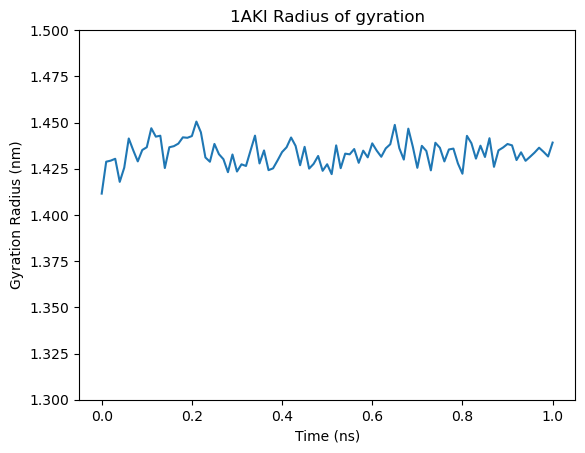

In [7]:
# read in the xvg file
gyrate_data = np.loadtxt("../Data/md_1ns/gyrate.xvg", skiprows=27)
# plot gyration radius vs. time
plt.plot(gyrate_data[:,0] / 1000, gyrate_data[:,1])
plt.xlabel("Time (ns)")
plt.ylabel("Gyration Radius (nm)")
# To get the similar plot as the one in the tutorial, set the y-axis range to [1.30, 1.50]
plt.ylim(1.30, 1.50)
plt.title("1AKI Radius of gyration")
plt.savefig("../Figures/md_1ns_gyrate.pdf")
plt.show()

### Creation of xtc and gro files without water

find the index of non-water atoms:

`gmx_mpi make_ndx -f md_0_50.gro -o index_no_water.ndx`

use trajconv to select only non-water atoms and output as xtc files:

`gmx_mpi trjconv -f md_0_50.xtc -o md_0_50_no_water.xtc -n index_no_water.ndx`

`gmx_mpi trjconv -f md_0_50.gro -s md_0_50.tpr -o md_0_50_no_water.gro`

### RMSD analysis for 50ns MD simulation result

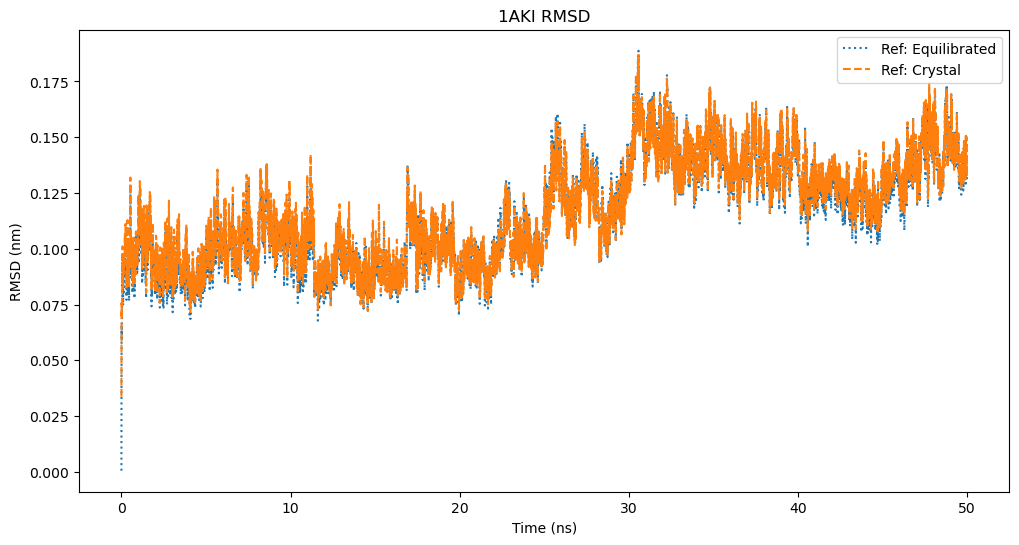

In [7]:
# read in the xvg file
rmsd_md_data = np.loadtxt("../Data/md_50ns/rmsd.xvg", skiprows=18)
rmsd_xtal_data = np.loadtxt("../Data/md_50ns/rmsd_xtal.xvg", skiprows=18)
# plot RMSD vs. time, use dot lines
plt.figure(figsize=(12, 6))
plt.plot(rmsd_md_data[:,0], rmsd_md_data[:,1], label="Ref: Equilibrated",linestyle=':')
plt.plot(rmsd_xtal_data[:,0], rmsd_xtal_data[:,1], label="Ref: Crystal", linestyle='--')
plt.xlabel("Time (ns)")
plt.ylabel("RMSD (nm)")
plt.legend()
plt.title("1AKI RMSD")
plt.savefig("../Figures/md_50ns_rmsd.pdf")
plt.show()

### Radius of gyration during 50ns MD simulation

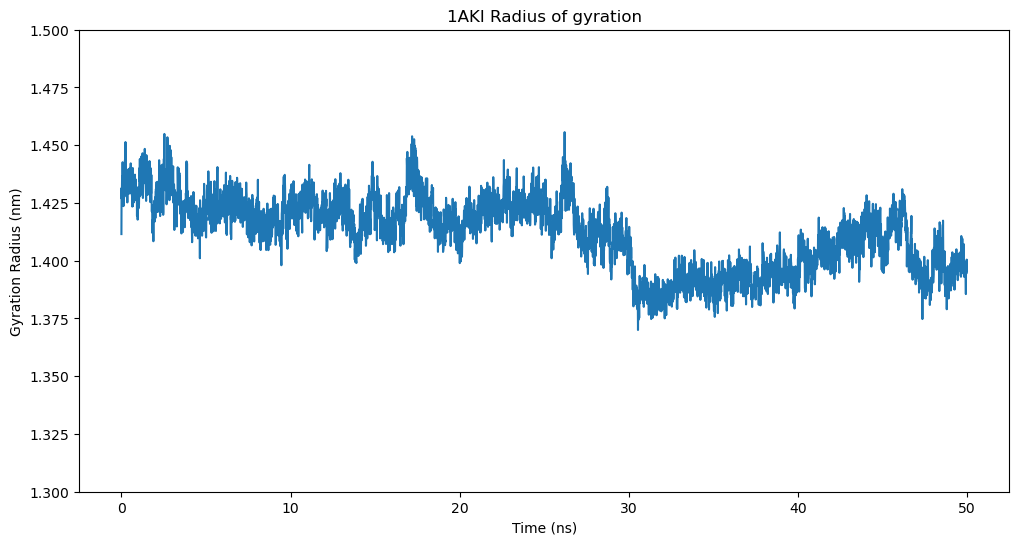

In [10]:
# read in the xvg file
gyrate_data = np.loadtxt("../Data/md_50ns/gyrate.xvg", skiprows=27)
# plot gyration radius vs. time
plt.figure(figsize=(12, 6))
plt.plot(gyrate_data[:,0] / 1000, gyrate_data[:,1])
plt.xlabel("Time (ns)")
plt.ylabel("Gyration Radius (nm)")
# To get the similar plot as the one in the tutorial, set the y-axis range to [1.30, 1.50]
plt.ylim(1.30, 1.50)
plt.title("1AKI Radius of gyration")
plt.savefig("../Figures/md_50ns_gyrate.pdf")
plt.show()